In [119]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
import math
import sklearn.dummy
import sklearn.tree

In [153]:
data = pd.read_csv('data/DATA_COURSE_DS.csv') #201911
data.sample(5)

GENDER  AGE   SERVICE  SESSION
56117     Male   24  Facebook      765
160787  Female   55    Google      776
164809  Female   48  Facebook      783
153716  Female   33   Tik Tok      984
12919   Female   44  Facebook       61

In [154]:
data.shape

(200000, 4)

In [155]:
data_group = data.groupby(['SERVICE']).agg({'AGE':'mean', 'SESSION': 'sum'}).sort_values(by='SESSION', ascending=False)
data_group

AGE   SESSION
SERVICE                           
Facebook       37.567622  57528444
Google         40.763658  33572577
Tik Tok        36.229813  30580487
WeChat         38.360248  10025376
LINE           42.557273   6162804
...                  ...       ...
Services-True  41.000000         1
Zello voice    44.000000         1
AliPay         43.000000         1
LinkedIn       58.000000         1
Bloomberg      53.000000         1

[333 rows x 2 columns]

In [156]:
data_top_20 = data_group.nlargest(20, "SESSION").reset_index()
data_top_20

SERVICE        AGE   SESSION
0                Facebook  37.567622  57528444
1                  Google  40.763658  33572577
2                 Tik Tok  36.229813  30580487
3                  WeChat  38.360248  10025376
4                    LINE  42.557273   6162804
5               Instagram  36.393369   5630169
6                      QQ  38.301892   5600801
7                 YouTube  40.127071   4228880
8                 Twitter  36.147596   2389461
9   TrueID Streaming Live  37.190311   2085679
10                  Apple  40.062423   1898057
11                  Skout  35.501657   1820524
12                 ROBLOX  41.379245    686231
13              BIGO LIVE  36.595238    658326
14             AIS_MOBILE  39.101473    600568
15           LINE WEBTOON  37.827191    520899
16          NetEase Games  36.709524    285748
17          FIFA Online 4  36.060870    279240
18            Google Maps  40.143345    273457
19                4shared  38.711370    243370

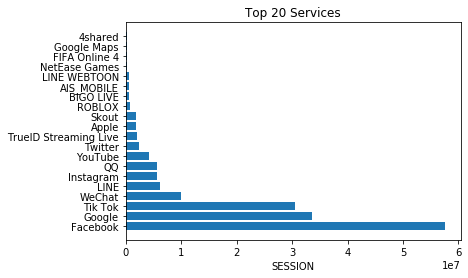

In [157]:
labels = data_top_20.SERVICE
y_pos = np.arange(len(labels))
value = data_top_20.SESSION

plt.barh(y_pos, value, align='center', alpha=1)
plt.yticks(y_pos, labels)
plt.xlabel('SESSION')
plt.title('Top 20 Services')

plt.show()

In [158]:
data_group_2 = data.groupby(['SERVICE','GENDER']).agg({'AGE':'mean', 'SESSION': 'sum'}).sort_values(by='SESSION', ascending=False)
data_group_2 = data_group_2.reset_index()

In [159]:
df_facebook = data_group_2[data_group_2.SERVICE == 'Facebook']
df_google = data_group_2[data_group_2.SERVICE == 'Google']
df_tiktok = data_group_2[data_group_2.SERVICE == 'Tik Tok']
df_wechat = data_group_2[data_group_2.SERVICE == 'WeChat']
df_line = data_group_2[data_group_2.SERVICE == 'LINE']
df_twitter = data_group_2[data_group_2.SERVICE == 'Twitter']
df_youtube = data_group_2[data_group_2.SERVICE == 'YouTube']
df_instagram = data_group_2[data_group_2.SERVICE == 'Instagram']

In [160]:
df_facebook

SERVICE  GENDER        AGE   SESSION
0  Facebook  Female  37.782472  38912802
3  Facebook    Male  37.140209  18615642

C:\Users\Anuwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


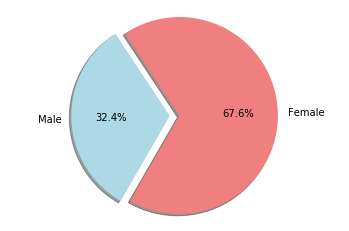

In [161]:
labels = df_facebook.GENDER
sizes = [df_facebook.SESSION]
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=240)

plt.axis('equal')
plt.show()

In [162]:
df_tiktok

SERVICE  GENDER        AGE   SESSION
2  Tik Tok    Male  36.485173  19464625
4  Tik Tok  Female  35.788630  11115862

C:\Users\Anuwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


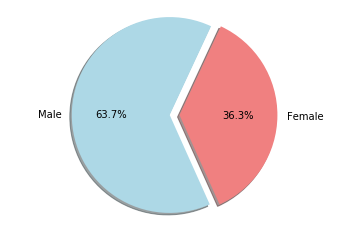

In [163]:
labels = df_tiktok.GENDER
sizes = [df_tiktok.SESSION]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=425)

plt.axis('equal')
plt.show()

In [164]:
df_line

SERVICE  GENDER        AGE  SESSION
8     LINE  Female  43.473809  3251145
11    LINE    Male  41.919703  2911659

C:\Users\Anuwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


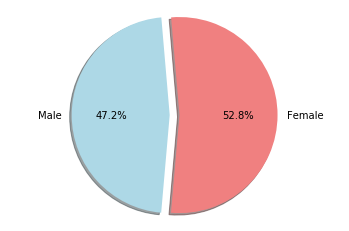

In [132]:
labels = df_line.GENDER
sizes = [df_line.SESSION]
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=265)

plt.axis('equal')
plt.show()

In [227]:
data2 = data

In [228]:
data2.loc[data2['GENDER'] == 'Male', 'GENDER'] = 1
data2.loc[data2['GENDER'] == 'Female', 'GENDER'] = 0
data2.sample(10)

C:\Users\Anuwat\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


GENDER  AGE      SERVICE  SESSION
68292        1   56        Apple       27
183932       0   66        Apple       85
84232        1   52  YouTube Web        2
187898       0   22       Google      481
100562       1   48     Facebook      369
148320       0   26     Facebook     1929
188627       0   35        Apple      393
198830       0   35     Facebook     1518
198955       1   70        Apple      140
65288        0   28       Google      997

In [229]:
data2 = pd.get_dummies(data2)

In [214]:
data2.iloc[:,3:]

SERVICE_360 AntiVirus  SERVICE_4chan  SERVICE_4shared  \
0                           0              0                0   
1                           0              0                0   
2                           0              0                0   
3                           0              0                0   
4                           0              0                0   
...                       ...            ...              ...   
199995                      0              0                0   
199996                      0              0                0   
199997                      0              0                0   
199998                      0              0                0   
199999                      0              0                0   

        SERVICE_AIS_MOBILE  SERVICE_AMP Project  SERVICE_AMoAd  SERVICE_APT  \
0                        0                    0              0            0   
1                        0                    0              0            0   
2                        0                    0              0            0   
3                        0                    0              0            0   
4                        0                    0              0            0   
...                    ...                  ...            ...          ...   
199995                   0                    0              0            0   
199996                   0                    0              0            0   
199997                   0                    0              0            0   
199998                   0                    0              0            0   
199999                   0                    0              0            0   

        SERVICE_AccuWeather  SERVICE_Adobe  SERVICE_Afreeca TV  ...  \
0                         0              0                   0  ...   
1                         0              0                   0  ...   
2                         0              0                   0  ...   
3                         0              0                   0  ...   
4                         0              0                   0  ...   
...                     ...            ...                 ...  ...   
199995                    0              0                   0  ...   
199996                    0              0                   0  ...   
199997                    0              0                   0  ...   
199998                    0              0                   0  ...   
199999                    0              0                   0  ...   

        SERVICE_iCloud mail  SERVICE_iOS Push Notification Service  \
0                         0                                      0   
1                         0                                      0   
2                         0                                      0   
3                         0                                      0   
4                         0                                      0   
...                     ...                                    ...   
199995                    0                                      0   
199996                    0                                      0   
199997                    0                                      0   
199998                    0                                      0   
199999                    0                                      0   

        SERVICE_iQIYI  SERVICE_iTunes Store  SERVICE_iTunes Store; video  \
0                   0                     0                            0   
1                   0                     0                            0   
2                   0                     0                            0   
3                   0                     0                            0   
4                   0                     0                            0   
...               ...                   ...                          ...   
199995              0                     0         

In [230]:
labels = data2['GENDER']
data2 = data2.drop('GENDER', axis = 1)
data2 = data2.values

In [231]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = \
train_test_split(data2, labels, test_size = 0.25, random_state = 42)

In [248]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (150000, 335)
Training Labels Shape: (150000,)
Testing Features Shape: (50000, 335)
Testing Labels Shape: (50000,)


In [ ]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {'bootstrap': [True, False],
             'max_depth': [10, 20, 30, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': randint(1, 9),
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 200]}

rf = RandomForestClassifier(random_state = 42)
rf_cv = RandomizedSearchCV(rf, param_dist, cv=5)
rf_cv.fit(train_features, train_labels)
predictions = rf_cv.predict(test_features)

# Print the tuned parameters and score
print("Tuned RandomForest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

In [247]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(test_labels, predictions))

0.70868


In [242]:
print(confusion_matrix(test_labels, predictions))

[[18312  6725]
 [ 7841 17122]]


In [243]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72     25037
           1       0.72      0.69      0.70     24963

    accuracy                           0.71     50000
   macro avg       0.71      0.71      0.71     50000
weighted avg       0.71      0.71      0.71     50000



In [245]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.29 degrees.


In [250]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.DataFrame(zip(data2.columns, rf.feature_importances_),
            columns=['Feature', 'Importance'])\
.sort_values(by='Importance', ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [215]:
# # Labels are the values we want to predict
# labels = np.array(data2['GENDER'])

# # Remove the labels from the features
# # axis 1 refers to the columns
# data2 = data2.drop('GENDER', axis = 1)

# # Saving feature names for later use
# data2_list = list(data2.columns)

# # Convert to numpy array
# data2 = np.array(data2)

In [216]:
# # Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(data2, labels, test_size = 0.25, random_state = 42)

In [218]:
# # Import the model we are using
# from sklearn.ensemble import RandomForestRegressor

# # Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# # Train the model on training data
# rf.fit(train_features, train_labels);

In [220]:
# dc = sklearn.dummy.DummyClassifier(strategy='most_frequent')
# dc.fit(data[['AGE', 'SERVICE', 'SESSION']], data.GENDER)
# dc.predict([[ True, 'Facebook', True], [ True, 'Google', True], [ True, 'Tik Tok', True],])

In [138]:
# dtc = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

In [219]:
# dtc.fit(data2[['AGE', 'SESSION']], data2.GENDER)
# print(sklearn.tree.export_graphviz(dtc, feature_names=['AGE', 'SESSION'], class_names=['Facebook', 'Twitter', 'Tik Tok', 'LINE', '']))